In [1]:
from IPython.core.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../

14694
/media/work/docs/codes/QuCF/scripts-py


<IPython.core.display.Javascript object>


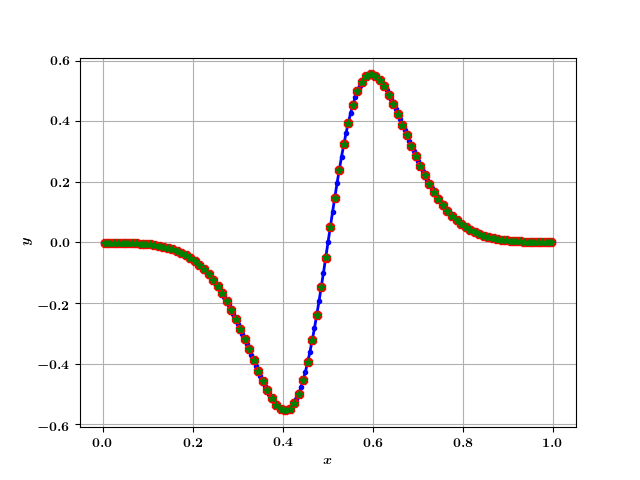

In [5]:
# --------------------------------------------------------------
# --- Test interpolation ---
# --------------------------------------------------------------
def int_f(x, x_int, y):
    Nx     = len(x)
    Nx_int = len(x_int)
    y_int = np.zeros(Nx_int)
    
    y_int[0] = 0.125 * (-y[2] + 6.*y[1] + 3.*y[0])
    
    for ii in range(1,Nx_int):
        y_int[ii] = 0.125 * (3.*y[ii+1] + 6.*y[ii] - y[ii-1])
       
    return y_int

def int_b(x, x_int, y):
    Nx     = len(x)
    Nx_int = len(x_int)  # = (Nx - 1)
    y_int = np.zeros(Nx_int)

    for ii in range(Nx_int-1):
        y_int[ii] = 0.125 * (-y[ii+2] + 6.*y[ii+1] + 3.*y[ii])
    
    k = Nx_int-1
    y_int[k] = 0.125 * (3.*y[k+1] + 6.*y[k] - y[k-1])
       
    return y_int
# --------------------------------------------------------------
# --------------------------------------------------------------


Lx, Nx = 1.0, 101
x = np.linspace(0,Lx,Nx)
hx = np.diff(x)[0]/2.
x_new = np.linspace(hx,Lx - hx, Nx-1)

# y = np.sin(x * 2.*np.pi/(0.25*Lx))

y = np.tanh((x-Lx/2.)/0.1) * np.exp(-pow(x-Lx/2.,2)/(2.*pow(Lx/8.,2)))

y_int_f = int_f(x, x_new, y)
y_int_b = int_b(x, x_new, y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,           y, 'b.', linewidth = 2, linestyle='-')
ax.plot(x_new, y_int_f, 'r8', linewidth = 2)
ax.plot(x_new, y_int_b, 'g*', linewidth = 2)
plt.xlabel('$x$')
plt.ylabel("$y$")
plt.grid(True)
plt.show()